In [20]:
import os
import json
import jsonlines
import pandas as pd
data_path="../data/analysis_longcot_instruction"
fl=os.listdir(data_path)
data=[]

runname_mapping={
    "rl.grpo_llama.3b_analysis_mmwebpro.openr1.ins.89101_cpt8k_rl8k_math.8k_0411_2035": "w/ Instruction Data",
    "rl.grpo_llama.3b_analysis_mmwebpro.openr1.91_math.8k_0411_2030": "w/o Instruction Data",
    "rl.grpo_llama.3b_math.8k_0411_2024": "Llama-3.2-3B", 
}    
color_mapping={
    "w/o Instruction Data": "#C411CF",
    "w/ Instruction Data": "#6666FF",
    "Llama-3.2-3B": "#A9A9A9",
}
benchmark_mapping={
    "amc23": "AMC23",
    "gsm8k": "GSM8k",
    "math500": "MATH500",
    "olympiadbench": "OlympiadBench"
}



fix_data={
    "acc": {
            "amc23": {
                "rl.grpo_llama.3b_math.8k_0411_2024": 2.5,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.91_math.8k_0411_2030": 1.0,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.ins.89101_cpt8k_rl8k_math.8k_0411_2035": 12.5,
            },
            "gsm8k": {
                "rl.grpo_llama.3b_math.8k_0411_2024": 30.47,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.91_math.8k_0411_2030": 53.14,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.ins.89101_cpt8k_rl8k_math.8k_0411_2035": 52.91,
            },
            "math500": {
                "rl.grpo_llama.3b_math.8k_0411_2024": 7.4,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.91_math.8k_0411_2030": 22.6,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.ins.89101_cpt8k_rl8k_math.8k_0411_2035": 24.0,
            },
            "olympiadbench": {
                "rl.grpo_llama.3b_math.8k_0411_2024": 2.07,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.91_math.8k_0411_2030": 3.703,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.ins.89101_cpt8k_rl8k_math.8k_0411_2035": 3.703,
            },
        },
    "length": {
            "amc23": {
                "rl.grpo_llama.3b_math.8k_0411_2024": 1024/1000,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.91_math.8k_0411_2030": 83.25/1000,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.ins.89101_cpt8k_rl8k_math.8k_0411_2035": 280.2/1000,
            },
            "gsm8k": {
                "rl.grpo_llama.3b_math.8k_0411_2024": 130.3963782696177/1000,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.91_math.8k_0411_2030": 89.85164051355207/1000,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.ins.89101_cpt8k_rl8k_math.8k_0411_2035": 90.32234957020057/1000,
            },
            "math500": {
                "rl.grpo_llama.3b_math.8k_0411_2024": 360.4054054054054/1000,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.91_math.8k_0411_2030": 138.56637168141592/1000,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.ins.89101_cpt8k_rl8k_math.8k_0411_2035": 139.83333333333334/1000,
            },
            "olympiadbench": {
                "rl.grpo_llama.3b_math.8k_0411_2024": 249.07246376811594/1000,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.91_math.8k_0411_2030": 283.72/1000,
                "rl.grpo_llama.3b_analysis_mmwebpro.openr1.ins.89101_cpt8k_rl8k_math.8k_0411_2035": 242.92/1000,
            },
        }
}



In [21]:
import os
import re
import pandas as pd

def process_csv_directory(directory_path):
    # 初始化三层字典结构
    result_dict = {}
    
    # 遍历目录中的所有文件
    for filename in os.listdir(directory_path):
        if filename.endswith(".csv"):
            # 解析文件名中的metric和benchmark
            match = re.match(r"^(.+?)_(.+?)\.csv$", filename)
            if not match:
                continue
            metric, benchmark = match.groups()
            
            # 读取CSV文件
            filepath = os.path.join(directory_path, filename)
            df = pd.read_csv(filepath)
            
            # 筛选列：排除包含MIN/MAX/step的列（不区分大小写）
            valid_columns = [
                col for col in df.columns 
                if not any(kwd in col.upper() for kwd in ["MIN", "MAX", "STEP"])
            ]
            filtered_df = df[valid_columns]
            
            # 构建字典结构
            metric_dict = result_dict.setdefault(metric, {})
            benchmark_dict = metric_dict.setdefault(benchmark, {})
            
            # 将每列数据转换为list存储
            for col in filtered_df.columns:
                legend_name=runname_mapping[col.split(" - ")[0]]
                benchmark_dict[legend_name] = filtered_df[col].tolist()
    
    return result_dict

# 使用方法
final_dict = process_csv_directory(data_path)

[0.2, 0.4, 0.4, 0.6, 1.0, 2.8000000000000003, 5.0, 10.2, 16.8, 30.8, 35.6, 36.8, 41.6, 43.0, 44.6, 46.800000000000004, 47.199999999999996, 49.4, 48.8, 50.6, 48.6, 46.800000000000004, 44.2, 37.4, 23.200000000000003, 0.0]
[0.0, 0.2, 0.4, 0.8, 1.7999999999999998, 3.5999999999999996, 6.6000000000000005, 15.4, 24.0, 31.4, 37.2, 40.8, 46.2, 46.800000000000004, 45.4, 46.6, 47.199999999999996, 47.599999999999994, 45.800000000000004, 45.4, 41.8, 28.199999999999996, 8.4, 7.199999999999999, nan, nan]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.07581501137225, 0.07581501137225, 0.07581501137225, 1.66793025018953, 17.43745261561789, 41.546626231993926, 51.40257771038665, 58.22592873388931, 63.153904473085674, 64.5185746777862, 68.46095526914328, 72.25170583775588, 73.91963608794542, 74.90523123578468, 75.28430629264594, 74.29871114480667, 73.84382107657316, 74.75360121304018, 69.59818043972706, 35.70887035633055, 0.0]
[0.07581501137225, 0.0, 0.07581501137225, 0.0, 0.0, 0.07581501137225, 0.07581501137225, 1.1372251

/var/folders/hw/5mp4078j08v45qscr_glgzkm0000gn/T/ipykernel_92310/1548753512.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


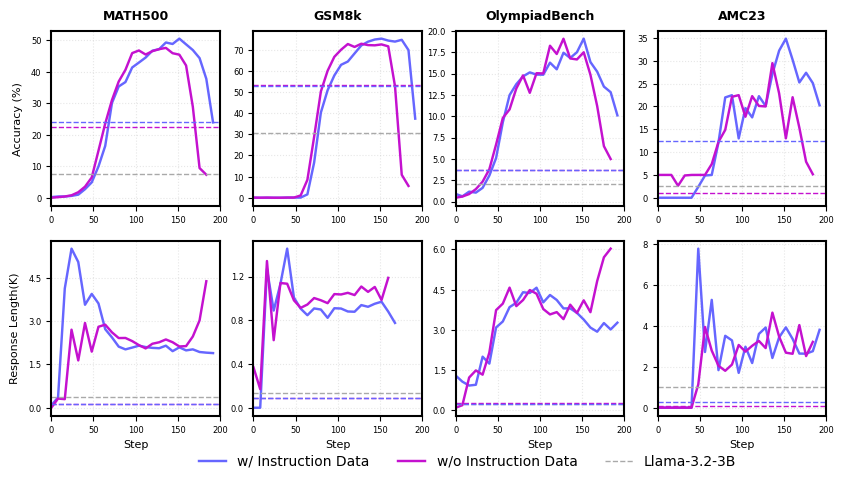

In [22]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from matplotlib.ticker import MaxNLocator

def compute_ema(values, alpha=0.2):
    """Compute Exponential Moving Average with smoothing factor alpha."""
    ema = np.zeros_like(values, dtype=float)
    ema[0] = values[0]
    for t in range(1, len(values)):
        ema[t] = alpha * values[t] + (1 - alpha) * ema[t-1]
    return ema

def plot_combined_charts(data_dict, figsize=(10, 5)):
    # 获取基准测试列表（假设所有metric有相同的benchmarks）
    metrics = list(data_dict.keys())
    benchmarks = ['math500', 'gsm8k', 'olympiadbench', 'amc23']
    n_benchmarks = len(benchmarks)

    # 创建画布和网格布局
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(2, n_benchmarks, figure=fig, hspace=0.2, wspace=0.2)

    # 颜色配置（可自定义）
    line_colors = ['#1f77b4', '#ff7f0e']  # 蓝色和橙色
    line_styles = ['-', '-']

    # 遍历每个metric行
    for row_idx, metric in enumerate(metrics):
        # 遍历每个benchmark列
        for col_idx, benchmark in enumerate(benchmarks):
            ax = fig.add_subplot(gs[row_idx, col_idx])
            # 每个subfigure的边框粗细
            ax.spines['top'].set_linewidth(1.5)
            ax.spines['bottom'].set_linewidth(1.5)
            ax.spines['left'].set_linewidth(1.5)
            ax.spines['right'].set_linewidth(1.5)

            ax.set_xlim(0, 200)
            
            # 获取当前数据集
            try:
                columns = data_dict[metric][benchmark]
            except KeyError:
                continue
            
            # 绘制每条折线
            for line_idx, (col_name, values) in enumerate(columns.items()):
                if metric.lower()=='length': values=[x/1000 for x in values]
                else: values=[x*100 for x in values]
                if not values[0]: values[0]=0.0
                print(values)
                truncated = values[:25]
                for idx, x in enumerate(truncated):
                    if idx<=20 and not (x<16384): truncated[idx]=0
                x = np.arange(len(truncated)) * 8  # X轴乘8

                ema = compute_ema(truncated, alpha=0.95)
                ax.plot(
                    x,
                    ema,
                    color=color_mapping[col_name],
                    linestyle=line_styles[line_idx % len(line_styles)],
                    linewidth=1.75,
                    # marker='o' if line_idx == 0 else 's',
                    markersize=2,
                    label=col_name
                )
            
            if metric in fix_data and benchmark in fix_data[metric]:
                for model_name, ref_value in fix_data[metric][benchmark].items():
                    if runname_mapping[model_name] == 'Llama-3.2-3B': label='Llama-3.2-3B'
                    else: label=None
                    ax.axhline(
                        y=ref_value,
                        linewidth=1,
                        linestyle='--', 
                        label=label,
                        color=color_mapping[runname_mapping[model_name]],
                    )
            
            # 设置子图标题和标签
            # ax.set_title(f"{metric.upper()} - {benchmark}", fontsize=10, pad=12)
            ax.set_xlabel("Step" if row_idx == 1 else "", fontsize=8)
            ax.set_ylabel(metric.upper(), fontsize=8)
            if metric == 'length':
                ax.yaxis.set_major_locator(MaxNLocator(nbins=5, prune='both'))
            
            # 显示图例
            # ax.legend(
            #     loc='upper right',
            #     fontsize=6,
            #     framealpha=0.9,
            #     ncol=1,
            #     borderpad=0.5
            # )

            if row_idx == 0:
                ax.set_title(benchmark_mapping[benchmark], fontsize=9, pad=8, weight='semibold')
            # Y轴标签设置（仅第一列）
            if col_idx == 0:
                ylabel = 'Accuracy (%)' if metric == 'acc' else 'Response Length(K)'
                ax.set_ylabel(ylabel, fontsize=8, labelpad=6)
            else:
                ax.set_ylabel("")

            # 统一y轴范围
            # all_values = np.concatenate([v for v in columns.values()])
            # ax.set_ylim(np.nanmin(all_values)*0.9, np.nanmax(all_values)*1.1)
            
            # 优化刻度显示
            ax.tick_params(axis='both', which='major', labelsize=6)
            ax.grid(True, alpha=0.3, linestyle=':')

            if col_idx == n_benchmarks-1 and row_idx == 0:
                ax.legend(
                    loc='upper left',
                    bbox_to_anchor=(-2.8, -1.35),
                    fontsize=10,
                    ncol=len(runname_mapping),
                    frameon=False
                )

    # 添加大标题
    # plt.suptitle("Benchmarks Performance Analysis", y=0.98, fontsize=14, weight='bold')

    # 调整布局
    plt.tight_layout()
    return fig

# 使用示例
fig = plot_combined_charts(final_dict)
plt.savefig("../figures/analysis_longcot_instruction.pdf")
plt.savefig("../figures/analysis_longcot_instruction.png", dpi=300, bbox_inches='tight', pad_inches=0.05)
plt.show()
